In [148]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn import metrics, preprocessing
from tqdm import tqdm

In [198]:
dataset_name = "ucicreditcard"

In [199]:
if dataset_name == "phishing":
    df = pd.read_csv(
        os.path.join("phishing", "phishing.data"), header=None
    )
    df[30] = df[30].apply(lambda x: 0 if x == -1 else 1)

    X = df[list(range(30))].values
    y = df[30].values
elif dataset_name == "ucicreditcard":
    df = pd.read_csv(os.path.join("ucicreditcard", "UCI_Credit_Card.csv"))

    X = df[
        [
            "LIMIT_BAL",
            "SEX",
            "EDUCATION",
            "MARRIAGE",
            "AGE",
            "PAY_0",
            "PAY_2",
            "PAY_3",
            "PAY_4",
            "PAY_5",
            "PAY_6",
            "BILL_AMT1",
            "BILL_AMT2",
            "BILL_AMT3",
            "BILL_AMT4",
            "BILL_AMT5",
            "BILL_AMT6",
            "PAY_AMT1",
            "PAY_AMT2",
            "PAY_AMT3",
            "PAY_AMT4",
            "PAY_AMT5",
            "PAY_AMT6",
        ]
    ].values
    y = df["default.payment.next.month"].values
elif dataset_name == "fraud":
    df = pd.read_csv(
        os.path.join("fraud", "fraud_detection_bank_dataset.csv")
    )
    df = df.drop(["col_8", "col_9", "col_10", "col_11", "col_12",
                  "col_18", "col_19", "col_20", "col_21", "col_35", "col_51",
                  "col_52", "col_53", "col_70", "col_71"], axis=1)

    X = df.drop(["Unnamed: 0", "targets"], axis=1).values
    y = df["targets"].values
elif dataset_name == "avila":
    df_tr = pd.read_csv(
        os.path.join("avila", "avila-tr.txt"),
        header=None,
    )
    df_ts = pd.read_csv(
        os.path.join("avila", "avila-ts.txt"),
        header=None,
    )
    df = pd.concat([df_tr, df_ts], axis=0)
    string2int = {
        s: i
        for i, s in enumerate(
            ["A", "B", "C", "D", "E", "F", "G", "H", "I", "W", "X", "Y"]
        )
    }
    df[10] = df[10].apply(lambda x: string2int[x])

    X = df[list(range(10))].values
    y = df[10].values

In [200]:
mm = preprocessing.MinMaxScaler()
X_minmax = mm.fit_transform(X)

selector = SelectKBest(mutual_info_classif, k=X.shape[1] * 0.5)
selector.fit(X_minmax, y)
scores = selector.scores_
#scores /= scores.max()
fti = scores

In [201]:
top_idxs = np.argsort(fti * -1)
vs = []
xs = [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.7, 0.9]
xs = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in [max(1, int(i * X_minmax.shape[1])) for i in xs]:
    clf = KMeans(n_clusters=len(np.unique(y)))
    clf.fit(X_minmax[:,top_idxs[:i]])
    vs.append(metrics.v_measure_score(y, clf.predict(X_minmax[:,top_idxs[:i]])))

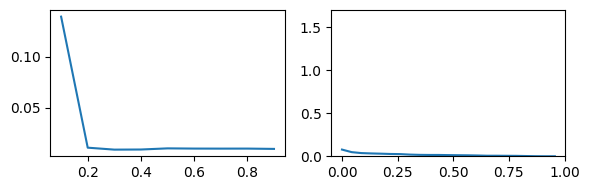

In [205]:
fig = plt.figure(figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.plot(xs, vs)
fig.add_subplot(1, 2, 2)
plt.plot(np.array(list(range(X.shape[1]))) / X.shape[1], fti[top_idxs])
plt.ylim(0, 1.7)
plt.tight_layout()

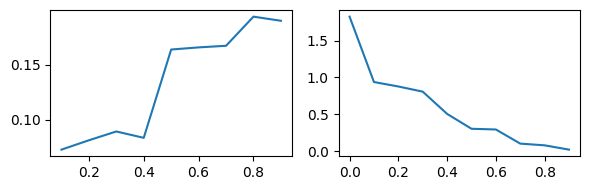

In [197]:
fig = plt.figure(figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.plot(xs, vs)
fig.add_subplot(1, 2, 2)
plt.plot(np.array(list(range(X.shape[1]))) / X.shape[1], fti[top_idxs])
plt.tight_layout()

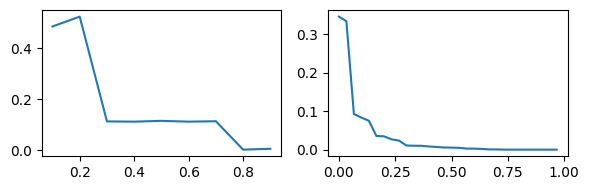

In [192]:
fig = plt.figure(figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.plot(xs, vs)
fig.add_subplot(1, 2, 2)
plt.plot(np.array(list(range(X.shape[1]))) / X.shape[1], fti[top_idxs])
plt.tight_layout()

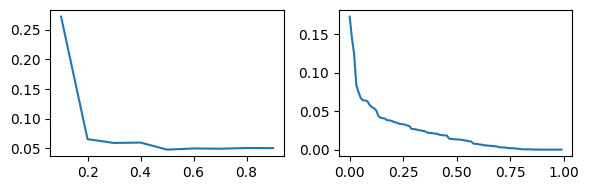

In [187]:
fig = plt.figure(figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.plot(xs, vs)
fig.add_subplot(1, 2, 2)
plt.plot(np.array(list(range(X.shape[1]))) / X.shape[1], fti[top_idxs])
plt.tight_layout()

In [142]:
[max(1, int(i * X_minmax.shape[1])) for i in xs]

[1, 1, 1, 1, 1, 2, 2, 3, 4, 5, 7, 9]